In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read and clean data

In [2]:
df = pd.read_csv('../../../Data/Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


### Rename columns

In [3]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

### Drop Alley column

In [4]:
df = df.drop(columns=['Alley'])

### Fill nans

In [5]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Lot Frontage                253
Year Garage                  63
Masonry/Veneer Area           8
Total Rooms Above Grade       0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Type                          0
Garage Finish                 0
Kitchens Above Grade          0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Kitchen Qual                  0
Garage Cars                   0
2nd Floor Area                0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence   

In [6]:
gb1 = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()

def fill_1(r):
    n = r.Nbhd
    
    x = r['Lot Frontage']
    
    if pd.isna(x):
        return gb1[n]
    else:
        return x
    # end
# end

df['Lot Frontage'] = df.apply(fill_1, axis=1)

In [7]:
gb2 = df.groupby(["Nbhd"])['Year Garage'].median().sort_values()

def fill_2(r):
    n = r.Nbhd
    
    x = r['Year Garage']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Year Garage'] = df.apply(fill_2, axis=1)

In [8]:
gb3 = df.groupby(["Nbhd"])['Masonry/Veneer Area'].median().sort_values()

def fill_3(r):
    n = r.Nbhd
    
    x = r['Masonry/Veneer Area']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Masonry/Veneer Area'] = df.apply(fill_3, axis=1)

In [9]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Type                          0
Kitchen Qual                  0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Total Rooms Above Grade       0
Kitchens Above Grade          0
1st Floor Area                0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Living Area Above Grade       0
Year Garage                   0
Garage Finish                 0
Garage Cars                   0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence                         0
Sale Typ

### Drop Masonry/Veneer column

In [10]:
df = df.drop(columns=['Masonry/Veneer'])

# Preprocess data

In [11]:
X_raw = df.drop(columns=['Sale Price'])
y = df['Sale Price']

### Split numeric and categorical columns for separate processing

In [12]:
X_num = X_raw.select_dtypes(exclude=object)
X_cat = X_raw.select_dtypes(include=object)

### Process numerical data in several ways

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

X_num_mm = pd.DataFrame()
X_num_ss = pd.DataFrame()
for c in X_num.columns:
    X_num_mm[c] = minmax_scaler.fit_transform(X_num[[c]])[:,0]
    X_num_ss[c] = std_scaler.fit_transform(X_num[[c]])[:,0]
# end

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_nmu_pca = pd.DataFrame(
    pca.fit_transform(X_num_ss)
)

### Get categorical dummies

In [15]:
X_dum = pd.get_dummies(X_cat).astype(int)

# Modeling

In [16]:
X = pd.concat([X_num_ss, X_dum], axis=1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=1, weights='uniform'),
    KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    KNeighborsRegressor(n_neighbors=10, weights='uniform'),
    RandomForestRegressor(n_estimators=10, max_depth=5),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
]

### Cross validation

In [18]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True)

for m in models:
    print(m)
    
    cv_scores = cross_val_score(m, X, y, cv=kf, scoring='r2')
    cv_scores = pd.DataFrame(cv_scores)
    display(cv_scores.describe().T)
    
    print()
# end

LinearRegression()


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.812353,0.06122,0.736444,0.756541,0.844142,0.854886,0.869751



KNeighborsRegressor(n_neighbors=1)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.500228,0.066179,0.389695,0.505385,0.507921,0.534155,0.563982



KNeighborsRegressor()


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.647702,0.026894,0.609574,0.630751,0.660558,0.661904,0.675721



KNeighborsRegressor(n_neighbors=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.630968,0.055292,0.567606,0.588977,0.627084,0.670262,0.700909



RandomForestRegressor(max_depth=5, n_estimators=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.807305,0.031788,0.762563,0.795659,0.814057,0.814417,0.84983



RandomForestRegressor(max_depth=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.853671,0.03587,0.815183,0.830561,0.841163,0.88003,0.901419



GradientBoostingRegressor(max_depth=2)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.878012,0.026056,0.836608,0.875083,0.885054,0.885529,0.907788



GradientBoostingRegressor(max_depth=5)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.845837,0.139471,0.597343,0.89424,0.901569,0.908247,0.927785



MLPRegressor(hidden_layer_sizes=(30, 20, 10), max_iter=1000, tol=1e-05)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.648102,0.240757,0.220063,0.730423,0.741787,0.748379,0.799859


### GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

# Define models and their parameter grids
param_grids = {
    "KNeighborsRegressor": (
        KNeighborsRegressor(),
        {
            "n_neighbors": [1, 5, 10, 20],
            "weights": ["uniform", "distance"]
        }
    ),
    
    "RandomForestRegressor": (
        RandomForestRegressor(),
        {
            "n_estimators": [10, 50, 100],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    ),
    
    "GradientBoostingRegressor": (
        GradientBoostingRegressor(),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [2, 3, 5]
        }
    )
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Perform GridSearchCV for each model
for name, (model, param_grid) in param_grids.items():
    print(f"Performing GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring="r2", n_jobs=-1)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    results.append({"Model": name, "Best Score": best_score, "Best Params": best_params})
# end

results

Performing GridSearchCV for KNeighborsRegressor...
Performing GridSearchCV for RandomForestRegressor...
Performing GridSearchCV for GradientBoostingRegressor...


[{'Model': 'KNeighborsRegressor',
  'Best Score': 0.6484233753143196,
  'Best Params': {'n_neighbors': 5, 'weights': 'distance'}},
 {'Model': 'RandomForestRegressor',
  'Best Score': 0.8648821287855425,
  'Best Params': {'max_depth': None,
   'min_samples_split': 2,
   'n_estimators': 100}},
 {'Model': 'GradientBoostingRegressor',
  'Best Score': 0.8955952672983425,
  'Best Params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}}]

### Parsiomny (remove excess features)

In [32]:
# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances = importances[:50]

features_rf = importances.index

X_pars = X[ features_rf ]

In [33]:
# Define models and their parameter grids
param_grids = {
    "KNeighborsRegressor": (
        KNeighborsRegressor(),
        {
            "n_neighbors": [1, 5, 10, 20],
            "weights": ["uniform", "distance"]
        }
    ),
    
    "RandomForestRegressor": (
        RandomForestRegressor(),
        {
            "n_estimators": [10, 50, 100],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    ),
    
    "GradientBoostingRegressor": (
        GradientBoostingRegressor(),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [2, 3, 5]
        }
    )
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Perform GridSearchCV for each model
for name, (model, param_grid) in param_grids.items():
    print(f"Performing GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring="r2", n_jobs=-1)
    grid_search.fit(X_pars, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    results.append({"Model": name, "Best Score": best_score, "Best Params": best_params})
# end

results

Performing GridSearchCV for KNeighborsRegressor...
Performing GridSearchCV for RandomForestRegressor...
Performing GridSearchCV for GradientBoostingRegressor...


[{'Model': 'KNeighborsRegressor',
  'Best Score': 0.6495196850156351,
  'Best Params': {'n_neighbors': 5, 'weights': 'distance'}},
 {'Model': 'RandomForestRegressor',
  'Best Score': 0.8662486059179173,
  'Best Params': {'max_depth': None,
   'min_samples_split': 2,
   'n_estimators': 100}},
 {'Model': 'GradientBoostingRegressor',
  'Best Score': 0.8919868031373891,
  'Best Params': {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}}]

### Dimension reduction w/ PCA

Run a cross validation using different numbers of PCA components and plot R2 vs. number of components

In [ ]:
mean_r2s = []
for i in tqdm(range(1,X_pars.shape[1]+1,5), ncols=50):
    
    pca = PCA(n_components=i)
    pca.fit(X_pars)
    X_pars_pca = pca.transform(X_pars)
    
    model = RandomForestRegressor()
    
    kf = KFold(n_splits=5, shuffle=True)
    cv_scores = cross_val_score(model, X_pars_pca, y, cv=kf, scoring='r2')
    cv_scores = pd.DataFrame(cv_scores)
    mean_r2s.append( cv_scores.mean() )
# end

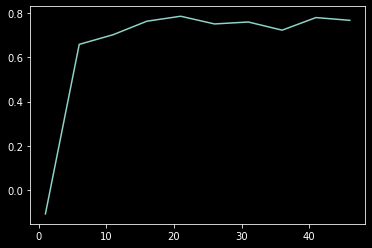

In [37]:
plt.plot(range(1,X_pars.shape[1],5), mean_r2s)